In [ ]:
SANJAI J

A PROJECT FOR AN INTERNSHIP AT "TECHNOHACKS"

TASK:PREDICTING HOUSE PRICES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from pandas.plotting import scatter_matrix

In [2]:
train_df = pd.read_csv('Dataset/train.csv')
test_df = pd.read_csv('Dataset/test.csv')
sample_submission_df = pd.read_csv('Dataset/sample_submission.csv')

In [3]:
all_data = pd.concat([train_df, test_df], ignore_index=True)

In [4]:
all_data['LotFrontage'].fillna(all_data['LotFrontage'].median(), inplace=True)
all_data['MasVnrArea'].fillna(0, inplace=True) 
all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].median(), inplace=True)

In [5]:
all_data['Alley'].fillna('None', inplace=True)
all_data['MasVnrType'].fillna('None', inplace=True)
all_data['BsmtQual'].fillna('None', inplace=True)
all_data['BsmtCond'].fillna('None', inplace=True)
all_data['BsmtExposure'].fillna('None', inplace=True)
all_data['BsmtFinType1'].fillna('None', inplace=True)
all_data['BsmtFinType2'].fillna('None', inplace=True)
all_data['FireplaceQu'].fillna('None', inplace=True)
all_data['GarageType'].fillna('None', inplace=True)
all_data['GarageFinish'].fillna('None', inplace=True)
all_data['GarageQual'].fillna('None', inplace=True)
all_data['GarageCond'].fillna('None', inplace=True)
all_data['PoolQC'].fillna('None', inplace=True)
all_data['Fence'].fillna('None', inplace=True)
all_data['MiscFeature'].fillna('None', inplace=True)
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0], inplace=True)

In [6]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [7]:
all_data = pd.get_dummies(all_data)

In [8]:
X_train = all_data.iloc[:len(train_df), :].drop(columns=['SalePrice'])
y_train = train_df['SalePrice']
X_test = all_data.iloc[len(train_df):, :].drop(columns=['SalePrice'])

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
X_test.fillna(X_test.mean(), inplace=True)
y_pred = model.predict(X_test)

In [11]:
mse_scorer = make_scorer(mean_squared_error)
cv_score = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring=mse_scorer))
print("Cross-Validation RMSE:", cv_score.mean())

Cross-Validation RMSE: nan


C:\Users\karth\AppData\Local\Temp\ipykernel_7560\2265212210.py:2: RuntimeWarning: invalid value encountered in sqrt
  cv_score = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring=mse_scorer))


In [12]:
predictions_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred})
print(predictions_df)
predictions_df.to_csv('Output/predictions.csv', index=True)

        Id  SalePrice
0     1461  126830.25
1     1462  160406.20
2     1463  181494.85
3     1464  182276.67
4     1465  197105.96
...    ...        ...
1454  2915   85437.00
1455  2916   86815.71
1456  2917  165620.20
1457  2918  120428.58
1458  2919  232522.31

[1459 rows x 2 columns]


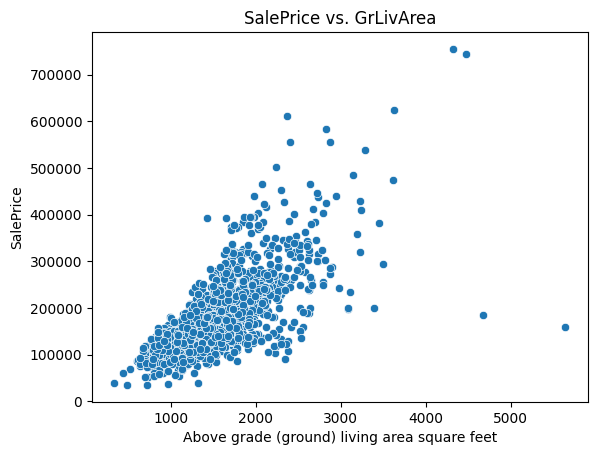

In [13]:
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('SalePrice')
plt.show()

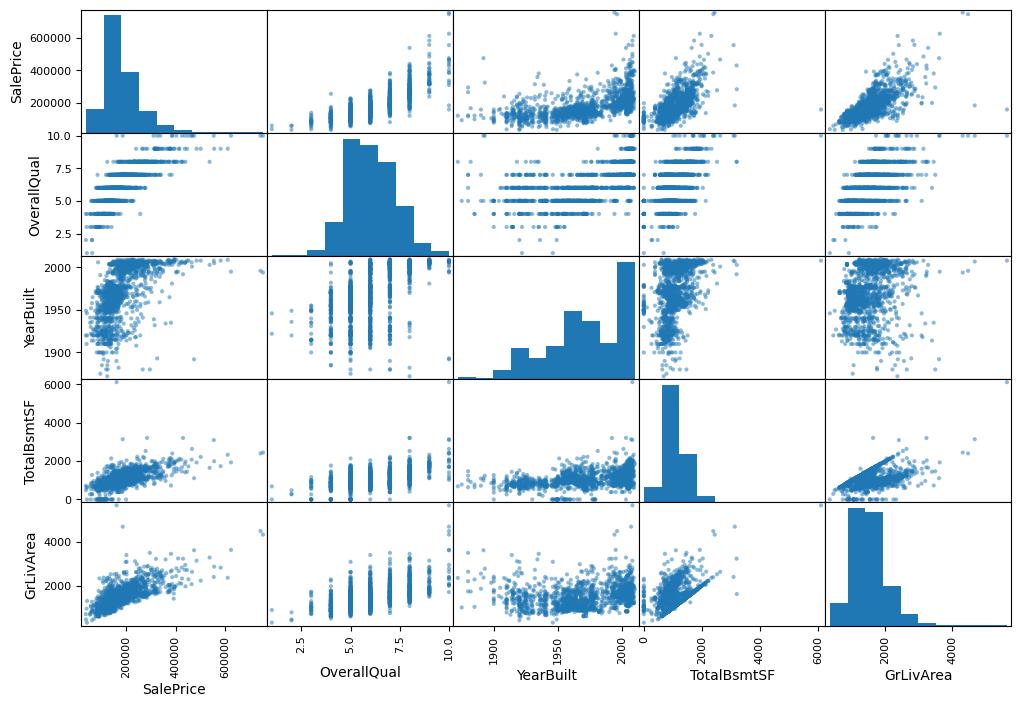

In [14]:
attributes = ['SalePrice', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']
scatter_matrix(train_df[attributes], figsize=(12, 8))
plt.show()